x.shape = (100, 1) y.shape = (100,)
Initial scatter plot


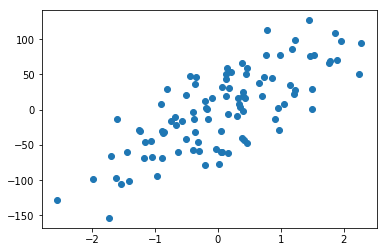

Converged successfully
theta0 = [-2.84588776] theta1 = [ 43.19804369]
Line plot after finding intercept and slope


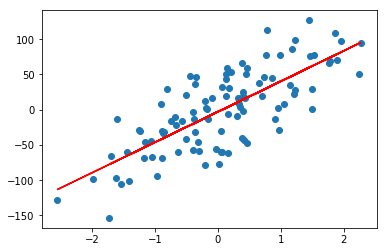

In [70]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt



def gradient_descent(alpha,x,y,ep=0.001, max_iter=1000):
    converged  = False
    iter = 0
    m = len(x) #Number of samples
    t0 = np.random.random(x.shape[1]) #Initial value of theta0
    t1 = np.random.random(x.shape[1]) #Initial value of theta1
    
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)]) #Initial Error
    
    while not converged:
        
        grad0 = 1.0/m*(sum([(t0+t1*x[i]-y[i]) for i in range(m)]))
        grad1 = 1.0/m*(sum([(t0+t1*x[i]-y[i])*x[i] for i in range(m)]))
        
        t0 = t0 - alpha * grad0
        t1 = t1 - alpha * grad1
        
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] )
        
        # Convergence takes place either 
        # 1)after completing all the iterations or 
        # 2)if error difference current and prev is less than some value here(0.0001)
        
        if abs(J-e)<0.0001:
            print "Converged successfully"
            converged = True
        
        
        if iter==max_iter:
            converged = True
        
        J=e
        iter+=1
        
    return t0,t1
        
    
#Dummy dataset
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, random_state=0, noise=35) 
print 'x.shape = %s y.shape = %s' %(x.shape, y.shape)

alpha = 0.01
ep = 0.01

print "Initial scatter plot"
plt.scatter(x,y)
plt.show()

theta0, theta1 = gradient_descent(alpha, x, y, ep, max_iter=1000)

print 'theta0 = %s theta1 = %s' %(theta0, theta1)

print "Line plot after finding intercept and slope"

plt.scatter(x,y)
plt.plot(x, theta0+x*theta1, 'r')
plt.show()
